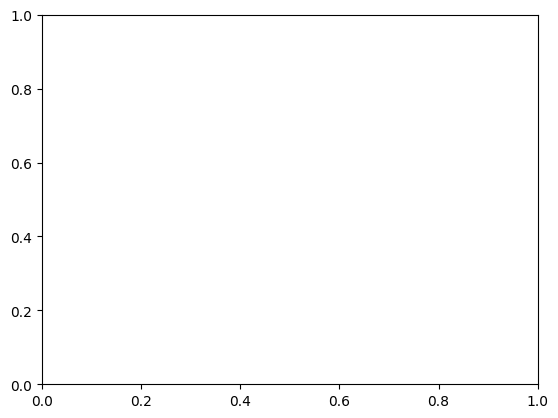

In [1]:
from netCDF4 import Dataset
from oceantracker.post_processing.read_output_files.read_ncdf_output_files import read_grid_file
from oceantracker.post_processing.read_output_files.load_output_files import load_grid
from oceantracker.post_processing.plotting.plot_utilities import draw_base_map

import matplotlib.pyplot as plt


In [3]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v50/22_11_01_depth_losses_v50_C000_caseInfo.json'
grid = load_grid(path_to_dir)

In [4]:
grid

{'x': array([[ 466927.5   , 5951626.    ],
        [ 466844.6875, 5951444.    ],
        [ 466761.5   , 5951262.    ],
        ...,
        [ 588706.1875, 5921222.    ],
        [ 588675.625 , 5921288.    ],
        [ 588733.8125, 5921270.    ]]),
 'triangles': array([[    3,     5,     0],
        [   15,     1,     0],
        [    0,     5,    15],
        ...,
        [41910, 41908, 41907],
        [41907, 41909, 41910],
        [41910, 41909, 41911]], dtype=int32),
 'triangle_area': array([16252.796875, 19033.03125 , 18364.265625, ...,  1785.875   ,
         1972.6875  ,  1645.125   ]),
 'adjacency': array([[    2,    -1,     8],
        [   -1,     2,     3],
        [   11,     1,     0],
        ...,
        [78365, 78368,    -1],
        [78369, 78367, 78366],
        [   -1,    -1, 78368]], dtype=int32),
 'node_type': array([2, 2, 2, ..., 2, 2, 2], dtype=int8),
 'is_boundary_triangle': array([1, 1, 0, ..., 1, 0, 1], dtype=int8),
 'water_depth': array([-4.369621, -7.37    , -6

In [7]:
grid

{'x': array([[ 466927.5   , 5951626.    ],
        [ 466844.6875, 5951444.    ],
        [ 466761.5   , 5951262.    ],
        ...,
        [ 588706.1875, 5921222.    ],
        [ 588675.625 , 5921288.    ],
        [ 588733.8125, 5921270.    ]]),
 'triangles': array([[    3,     5,     0],
        [   15,     1,     0],
        [    0,     5,    15],
        ...,
        [41910, 41908, 41907],
        [41907, 41909, 41910],
        [41910, 41909, 41911]], dtype=int32),
 'triangle_area': array([16252.796875, 19033.03125 , 18364.265625, ...,  1785.875   ,
         1972.6875  ,  1645.125   ]),
 'adjacency': array([[    2,    -1,     8],
        [   -1,     2,     3],
        [   11,     1,     0],
        ...,
        [78365, 78368,    -1],
        [78369, 78367, 78366],
        [   -1,    -1, 78368]], dtype=int32),
 'node_type': array([2, 2, 2, ..., 2, 2, 2], dtype=int8),
 'is_boundary_triangle': array([1, 1, 0, ..., 1, 0, 1], dtype=int8),
 'water_depth': array([-4.369621, -7.37    , -6

In [16]:
x = grid['x'][:,0]
y = grid['x'][:,1]
tri = grid['triangles'][:,:3]
tri_area = grid['triangle_area']
depth = grid['water_depth']

In [20]:
volume = 0
for triangle in tri:
    volume += tri_area[triangle[0]] * depth[triangle[0]] 
    # volume += tri_area[triangle[1]] * depth[triangle[1]] / 3
    # volume += tri_area[triangle[2]] * depth[triangle[2]] / 3
volume
# write in exp notation
print(f'{volume:.2e} m^3')

2.53e+10 m^3


In [22]:
print(f'{1e10 * 1e6 / 1e9:.2e} m^3')

1.00e+07 m^3


In [14]:
x.shape

(41912,)

In [12]:
def calculate_area_of_simplex(x,y):
    x = x - x[0]
    y = y - y[0]
    return 0.5 * (x[1]*y[2] - x[2]*y[1])

['x',
 'triangles',
 'triangle_area',
 'adjacency',
 'node_type',
 'is_boundary_triangle',
 'water_depth',
 'grid_outline']